In [104]:
import pandas as pd
import numpy as np
from initializer import init

init()
%matplotlib inline

# 1. About Returns

> 수익률에 관하여

In [105]:
df = pd.DataFrame(
    {"price": [1, 1.02, 1.01, 1.05]},
    index=[1, 2, 3, 4]
)
df

,price
1,1.000
2,1.020
3,1.010
4,1.050


## 1.1. Simple daily return

> 일별 수익률

- $r_n = p_n / p_{n-1} - 1$

- Example 1: Daily Return
  - $r_s$: $1.02 / 1 - 1 = 0.02$ -> Percentage(%) $0.02 * 100 = 2\%$
  - `returns = [0, 0.02, -0.0098, 0.0396]`

- Example 2: Cumulative Return
  1. Using `returns`: $1 * (1 + 0.02)(1 - 0.0098)(1 + 0.0396) / 1 - 1 = 0.05$
  2. Using `first / last` price value: $1.05 / 1 - 1 = 0.05$

- Example 3: Average Daily Return
  - $1 * (1 + x)^3 = 1 * (1 + 0.02)(1 - 0.0098)(1 + 0.0396) = 1.05 / 1 = p_4 / p_1$
    - $1 + x = (p_4 / p_1)^{1 / 3}$
  - $(p_n / p_1)^{1 / (n - 1)}$

- 참고
  - 산술평균 [X] : $\frac{0.02 - 0.0098 + 0.0396}{3}$
  - 복리 Compound
    - (0.02의 수익을 얻은 후의 값)에 대해서 (-0.0098)의 손실을 본 것이지,
      (원금)에 대해서 0.02, -0.0098 등의 손익, 손실을 본 것이 아님

## 1.2. Log Daily Return

> 일별 로그 수익률

- $r_n = log{{p_{n}} \over {p_{n-1}}}$
    - natural log

- Example1: Daily return
    - $r_2$: $log({{1.02} \over {1}})$ = 0.0198
    - `returns` = [0, 0.01980263, -0.0098523,  0.03883983]
        - simple daily return 값이랑 거의 유사

- Example2: Cumulative return
    - Using `returns`
        - `sum(returns)` = $log{{p_2} \over {p_1}} + log{{p_3} \over {p_2}} + log{{p_4} \over {p_3}} = log{{p_4} \over {p_1}}$
        - cum return = $e^{log{{p_4} \over {p_1}}} - 1$
            - np.exp(0.01980263 -0.0098523 + 0.03883983) - 1 = 0.05
    - Using only last price value
        - 1.05/1 - 1 = 0.05

- Example3: Average daily return
    - 이 경우, Average **log** daily return을 구하게됨
    - 곱이 아니라, 그냥 산술평균으로 가능!
        - why?
            - ${{1}\over{3}}(log{{p_2} \over {p_1}} + log{{p_3} \over {p_2}} + log{{p_4} \over {p_3}})$
            - = ${{1}\over{3}}log{{p_4} \over {p_1}}$ = $log({{p_4} \over {p_1}})^{{1}\over{3}}$
            - 후에 exponential만 취해주면, Simple Daily return에서 Avg return 구할 때의 형태가 나옴!

## 1.3. Simple return <--> log return 

$$
\begin{aligned}
r_l = log(r_s + 1) \\
r_s = e^{r_l} - 1
\end{aligned}
$$

# 2. Daily Return - Code

In [106]:
import FinanceDataReader as fdr

a = fdr.DataReader("005930", "2018-01-02", "2018-10-30")
b = fdr.DataReader("069500", "2018-01-02", "2018-10-30")

df = pd.concat([a["Close"], b["Close"]], axis=1)
df.columns = ["삼성전자", "KODEX 200"]
df.head()
df.index

,삼성전자,KODEX 200
Date,,
2018-01-02,51020,29836
2018-01-03,51620,29964
2018-01-04,51080,29727
2018-01-05,52120,30131
2018-01-08,52020,30333


DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-22',
               '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
               '2018-10-29', '2018-10-30'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)

## 2.1. `shift`

In [107]:
df.head(3)
df.shift().head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,51020,29836
2018-01-03,51620,29964
2018-01-04,51080,29727


,삼성전자,KODEX 200
Date,,
2018-01-02,NaN,NaN
2018-01-03,51020.000,29836.000
2018-01-04,51620.000,29964.000


In [108]:
df.shift(periods=1).head(3)
df.shift(1, freq="S").head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,NaN,NaN
2018-01-03,51020.000,29836.000
2018-01-04,51620.000,29964.000


,삼성전자,KODEX 200
Date,,
2018-01-02 00:00:01,51020,29836
2018-01-03 00:00:01,51620,29964
2018-01-04 00:00:01,51080,29727


## 2.2. `pct_change`

In [109]:
"""DataFrame으로 수익률 계산"""
(df / df.shift() - 1).head()

'DataFrame으로 수익률 계산'

,삼성전자,KODEX 200
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.012,0.004
2018-01-04,-0.010,-0.008
2018-01-05,0.020,0.014
2018-01-08,-0.002,0.007


In [110]:
"""수익률 계산은 pandas 내장 함수로 이미 제공한다."""
df.pct_change(periods=1).head(3) # 1일 수익률
df.pct_change(periods=2).head(3) # 2일 수익률

'수익률 계산은 pandas 내장 함수로 이미 제공한다.'

,삼성전자,KODEX 200
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.012,0.004
2018-01-04,-0.010,-0.008


,삼성전자,KODEX 200
Date,,
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,0.001,-0.004


## 2.3. Simple Return

In [111]:
# pct_change 함수를 거치면 1행이 NaN으로 채워지기 때문에 원활한 계산을 위해 fillna(0)을 수행한다.
df.pct_change().fillna(0).head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,0.004
2018-01-04,-0.010,-0.008


## 2.4. Log Return

In [112]:
log_rtn_df: pd.DataFrame = np.log(df / df.shift(1)).fillna(0)
log_rtn_df.head(3)

log_rtn_df: pd.DataFrame = np.log(df.pct_change() + 1).fillna(0)
log_rtn_df.head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,0.004
2018-01-04,-0.011,-0.008


,삼성전자,KODEX 200
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,0.004
2018-01-04,-0.011,-0.008


## 2.5. Return Visualization

In [113]:
# matplotlib korean setting
import matplotlib.font_manager as fm
import matplotlib as mpl
%matplotlib inline

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

[('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('Noto Sans Gothic',
  '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf')]

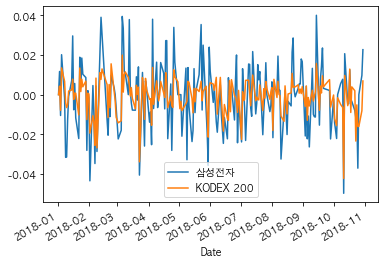

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

log_rtn_df.plot();

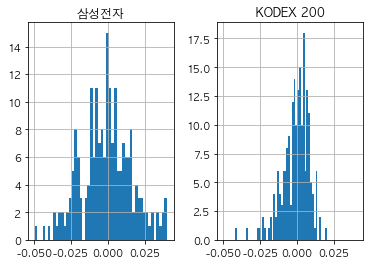

In [115]:
log_rtn_df.hist(bins=50, sharex=True);

<AxesSubplot:>

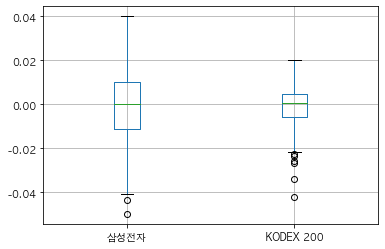

In [116]:
log_rtn_df.boxplot()

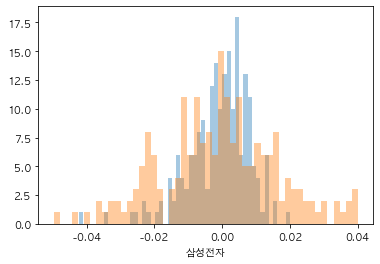

In [118]:
sns.distplot(log_rtn_df["KODEX 200"], kde=False, bins=50)
sns.distplot(log_rtn_df["삼성전자"], kde=False, bins=50);

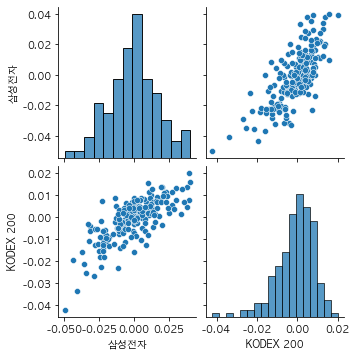

In [120]:
sns.pairplot(log_rtn_df);

# 3. Cumulative Return (누적 수익률) - Code

In [121]:
df.head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,51020,29836
2018-01-03,51620,29964
2018-01-04,51080,29727


## 3.1. From Price Data

In [124]:
cum_rtn_df = df / df.iloc[0]
cum_rtn_df.head(3)

seed_money = 1_000_000
(cum_rtn_df * seed_money).head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,1.000,1.000
2018-01-03,1.012,1.004
2018-01-04,1.001,0.996


,삼성전자,KODEX 200
Date,,
2018-01-02,1000000.000,1000000.000
2018-01-03,1011760.094,1004290.119
2018-01-04,1001176.009,996346.695


## 3.2. From Simple Return Data

$$
\begin{aligned}
&1 \\
&1 \times (r_1 + 1) \\
&1 \times (r_1 + 1) \times (r_2 + 1) \\
&1 \times (r_1 + 1) \times (r_2 + 1) \times (r_3 + 1) \\
&1 \times (r_1 + 1) \times (r_2 + 1) \times (r_3 + 1) \dots \times (r_n + 1) \\
\end{aligned}
$$

In [129]:
simple_rtn_df = df.pct_change().fillna(0)
simple_rtn_df.head(3)
(1 + simple_rtn_df).head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,0.004
2018-01-04,-0.010,-0.008


,삼성전자,KODEX 200
Date,,
2018-01-02,1.000,1.000
2018-01-03,1.012,1.004
2018-01-04,0.990,0.992


In [130]:
cum_rtn_df = (1 + simple_rtn_df).cumprod()
cum_rtn_df.head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,1.000,1.000
2018-01-03,1.012,1.004
2018-01-04,1.001,0.996


In [161]:
"""3.1 방식과 3.2 방식의 결과 비교: 미세한 값 차이는 존재하나 거의 동일하다. 소수점 14자리부터 다름(의미가 없나? 근데 equals로는 실패함)"""
a = df / df.iloc[0]
b = (1 + simple_rtn_df).cumprod()

size = len(a)

for i in range(len(a)):
    assert round(a.iloc[i]["삼성전자"], 13) == round(b.iloc[i]["삼성전자"], 13)
    assert round(a.iloc[i]["KODEX 200"], 13) == round(b.iloc[i]["KODEX 200"], 13)

'3.1 방식과 3.2 방식의 결과 비교: 미세한 값 차이는 존재하나 거의 동일하다. 소수점 14자리부터 다름(의미가 없나? 근데 equals로는 실패함)'

## 3.3. From Log Return Data

$$
\begin{aligned}
&log{p_2 \over p_1} \\
\\
&log{p_2 \over p_1} + log{p_3 \over p_2} (= log{p_3 \over p_1}) \\
\\
&log{p_2 \over p_1} + log{p_3 \over p_2} +  \dots + log{p_n \over p_{n-1}} (= log{p_n \over p_1})
\end{aligned}
$$

In [160]:
log_rtn_df.head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,0.004
2018-01-04,-0.011,-0.008


In [163]:
np.exp(log_rtn_df.cumsum()).head(3)

,삼성전자,KODEX 200
Date,,
2018-01-02,1.000,1.000
2018-01-03,1.012,1.004
2018-01-04,1.001,0.996


In [164]:
"""3.1 vs 3.2 vs 3.3"""
a = df / df.iloc[0]
b = (1 + simple_rtn_df).cumprod()
c = np.exp(log_rtn_df.cumsum())

size = len(a)

for i in range(len(a)):
    assert round(c.iloc[i]["삼성전자"], 13) == round(a.iloc[i]["삼성전자"], 13)
    assert round(c.iloc[i]["삼성전자"], 13) == round(b.iloc[i]["삼성전자"], 13)
    assert round(c.iloc[i]["KODEX 200"], 13) == round(a.iloc[i]["KODEX 200"], 13)
    assert round(c.iloc[i]["KODEX 200"], 13) == round(b.iloc[i]["KODEX 200"], 13)

'3.1 vs 3.2 vs 3.3'

## 3.4. Cum Return Visualization

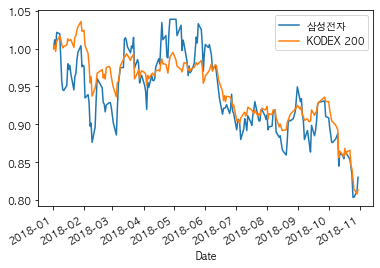

In [165]:
cum_rtn_df.plot();

# 4. Log Return vs Simple Return

1. Arithmetic(Simple) return has a positive bias
    - 복리계산(기하평균)으로 인한 +/- 수익률 관계의 분균형을 없애줌
    - 첫날 10% 수익, 둘째날 2% 손실을 본 경우
       - ${{p_2}\over{p_1}} - 1 = 0.10$
       - ${{p_3}\over{p_2}} - 1 = -0.02$
       - Simple Return
         - $1\times(1+0.10)\times(1-0.02)=1.078$ vs $1+(0.10)+(-0.02)=1.08$
           - $(0.10\times(-0.02))$ term이 추가적으로 더해지기 떄문에 bias가 발생
         - Simple Return을 sum up 하면 실제 나와야 하는 값(기하적으로 구한 값, 1.078)보다 '+' bias가 있음을 알 수 있다.
       - Log Return
         - $log{{p_2}\over{p_1}}=log1.1=0.0953$
         - $log{{p_3}\over{p_2}}=log0.98=-0.0202$
         - 이 둘을 더하면 $0.0751$
         - 더한 결과를 식으로 표현하면 $log{{p_3}\over{p_1}}$ 이므로, `exp`를 씌워 ${p_3}\over{p_1}$을 구하면, $1.078$이 나온다.
2. Additivity
    - Multi-period log return = sum(log_rtn_1, log_rtn_2, ...)
3. Numerically safe
    - 작은 소수점의 곱은 arithmetic underflow 현상을 유발할 수 있다.
    - log() & '+' 연산은 이 현상에 있어 안전하다.

In [171]:
"""실제 계산 시 0이 나오면 안 되지만 0이 나오는 것을 확인할 수 있다. 반면 log 연산은 안전하다."""
np.prod(1 / np.array(range(1, 2000)))
np.sum(np.log(1 / np.array(range(1, 2000))))

'실제 계산 시 0이 나오면 안 되지만 0이 나오는 것을 확인할 수 있다. 반면 log 연산은 안전하다.'

0.0

-13198.923448054265

4. Approximate Equality

$$
log(1 + r) = r, if |r| < 1
$$

> log를 사용하면 위와 같이 생각해도 큰 무리가 없기 때문에 log 방식을 사용하면 안전하다.

5. Convenient in modeling (normality)

    - Central limit theorem(중심극한정리)
        - The **sum** of random variables frmo I.I.D(Independent Identical Distribution) approaches a normal distribution(정규분포)
        - For calculating n days returns
            - Simple return
                - $ \prod_{i}{(1+r_i)} - 1$
            - log return
                - $\sum_i{log(1+r_i)}$
                - $log({{p_t} \over {p_0}}) = log(1 + r_1) + log(1 + r_2) + ... + log(1+r_n)$
                    - $X_1 = log(1 + r_1) $  ~ A distribution
                    - $X_2 = log(1 + r_2) $  ~ A distribution
                    - ...
                    - $X_n = log(1 + r_n) $  ~ A distribution
                - Even if X are not normal, as long as they are IID, their long term sum will be approximately normal!
                    - X가 정규분포가 아니더라도, 그 합(혹은 평균)을 새로운 랜덤변수로 하는 분포는 근사적으로 정규분포를 따른다!
                    - $X_1 + X_2 + .. + X_n$ ~ Nomral distribution!!

        - 참고: Simple return은 r을 사용하지만, N day return은 (1+r)들의 **곱셈**으로 표현됨 -> 정규분포를 따르는 랜덤변수끼리의 곱으로 표현되는 새로운 랜덤변수는 정규분포를 따르지 않음!

    - distribution of price
        - $X_1 + X_2 + .. + X_n$ ~ Nomral distribution
        - $ log({{p_t} \over {p_0}}) = X_1 + X_2 + .. + X_n$ ~ Normal distribution
        - $ log({p_t}) - log({p_0})$  ~ Normal distribution
        - $ log({p_t})$  ~ Normal distribution

        - if Y has a normal distribution, then the exponential function of Y, X = exp(Y), has a log-normal distribution
            - https://en.wikipedia.org/wiki/Log-normal_distribution
            - ![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/PDF-log_normal_distributions.svg/300px-PDF-log_normal_distributions.svg.png)


- But in real world

![](https://miro.medium.com/max/700/1*7nrltX4x51aanCQqAdwt6Q.png)